In [1]:
from collections import defaultdict
import numpy as np
import tqdm
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# format:
# (successor, len of successor)
dic = {
    1: (4, 1),
    2: (1, 2),
    4: (2, 0) 
}

In [3]:
even = lambda n: n/2
odd = lambda n: 3*n+1

def _helper(n):
    if n%2:
        return odd(n)
    return even(n)

In [10]:
def get_suc(n):
    if n not in dic:
        n_ = int(_helper(n))
        dic[n] = (n_, get_suc(n_)[1] + 1)
    return dic[n]

In [20]:
for n in tqdm.tqdm(range(1,1_000)):#_000_000)):
    get_suc(int(n))

100%|██████████| 999/999 [00:00<00:00, 127262.25it/s]


In [120]:
G = nx.DiGraph()
for k, v in dic.items():
    if v[1] > 10:
        continue
    G.add_edge(k,v[0])

/home/fourier/anaconda3/lib/python3.7/site-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


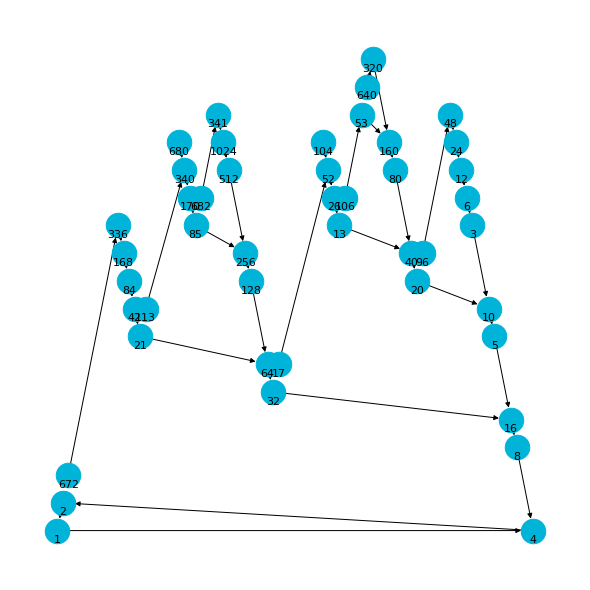

In [124]:
plt.figure(figsize=(8,8))
#pos = nx.kamada_kawai_layout(G)
pos = nx.planar_layout(G)
nx.draw(G, pos, node_size=600, node_color='#00b4d9')
#nx.draw_networkx_edge_labels(g, pos,edge_labels=)

for t, coords in pos.items():
    plt.text(coords[0], coords[1]-.01, s=str(t), fontsize=11, horizontalalignment='center')

#plt.savefig('collatz_graph_len=12.png')